In [1]:
import pickle
import numpy as np

# данные получены с помощью функции make_classification 
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [2]:
import numpy as np
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import pyplot as plt

In [3]:
def random_centroids_selection(X, n, k):
    """инициализируем рандомом центы кластеров """
    result = []
    random_selection = np.random.randint(0, n, size=k)
    for obj_id in random_selection:
        result.append(X[obj_id, :])
    return result

In [16]:
def eval_weight_evolution(centroid_objects_prev, centroid_objects, k):
    """Вычисляем, как сдвинулись центры за один шаг алгоритма"""
    result =[]
    for i in range(0, k):
        dist = distance.euclidean(
            centroid_objects_prev[i],
            centroid_objects[i]
        )
        result.append(dist)
    return result

In [22]:
def eval_cluster_labels(X, centroids_objects):
    "Вычисляем метски кластеров"
    cluster_distances = euclidean_distances(X, centroids_objects)
    cluster_labels = cluster_distances.argmin(axis=1)
    return cluster_labels

In [25]:
def eval_centroids(X, k, cluster_labels):
    """Вычисляем центры кластеров"""
    result = []
    for i in range(k):
        new_centroid = X[cluster_labels==i].mean(axis=0)
        result.append(new_centroid)
    return result

шаг 0, смещение кластеров: [2.007809177953248, 2.22826023614511]
шаг 1, смещение кластеров: [0.23859864606026795, 0.1870817111073781]
шаг 2, смещение кластеров: [0.11044352314595567, 0.0842242951004995]
шаг 3, смещение кластеров: [0.23277460600573402, 0.2096292532277929]
шаг 4, смещение кластеров: [0.17789218866112005, 0.1860996480981349]
шаг 5, смещение кластеров: [0.18209631248258992, 0.18670522767867515]
шаг 6, смещение кластеров: [0.0, 0.0]


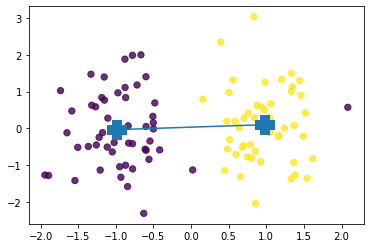

In [34]:
def k_means(X: np.array, k: int=2, eps: float=0.001, num_iteration: int=10):
    """Алгоритм К-средних
    
    :param X: обучающая выборка
    :param k: количество кластеров
    """
    centroids, cluster_labels = None, None
    try:
        n, m = X.shape
    except ValueError:
        print('Передан некорреткный обьект X')
    #инициализируем рандомом центы кластеров
    centroid_objects_prev = [np.zeros(m) for i in range(k)]
    centroid_objects = random_centroids_selection(X, n, k)
    weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
    step = 0
    while step < num_iteration and sum(weight_evolution[i] > eps for i in range(k))!=0:
        centroid_objects_prev = centroid_objects.copy()
        #вычислям метки кластеров
        cluster_labels = eval_cluster_labels(X, centroid_objects)
        #вычисляем центроиды кластеров
        centroid_objects = eval_centroids(X , k, cluster_labels)
        #на сколько сместились класетра
        weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
        print("шаг %s, смещение кластеров: %s" % (step, weight_evolution))
        step +=1
    return np.vstack(centroid_objects), cluster_labels
   
    
centroids, cluster_labels = k_means(X, k=2, num_iteration=10)
centroids, cluster_labels

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.plot(centroids[:, 0], centroids[:, 1], marker='+', mew=10, ms=20)
plt.show()